In [39]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
classes = {'normal': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}

# Load and preprocess the dataset
X = []
Y = []
for cls, label in classes.items():
    pth = f"C:\\Users\\dell\\OneDrive\\Desktop\\Data\\Train_Data\\{cls}"
    for filename in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, filename), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img.flatten() / 255.0)  
        Y.append(label)
X = np.array(X)
Y = np.array(Y)

In [41]:
# xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=3, test_size=0.1)
# x_train, x_test, val_train, val_test = train_test_split(X, Y, random_state=28, test_size=0.2)
x_train, x_test, val_train, val_test = train_test_split(X, Y, random_state=9, test_size=0.1)

In [42]:
# pca = PCA(n_components=0.96)
pca = PCA(n_components=0.96)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [43]:
sv = SVC()
sv.fit(pca_train, val_train)

SVC()

In [44]:
training_score = sv.score(pca_train, val_train)
testing_score = sv.score(pca_test, val_test)
print("Training Score for Support Vector Classifier is:", training_score)
print("Testing Score for Support Vector Classifier is:", testing_score)

Training Score for Support Vector Classifier is: 0.9361078546307151
Testing Score for Support Vector Classifier is: 0.8631578947368421


In [45]:
# from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression()
# lr.fit(pca_train,ytrain)
# # pred=lr.predict(xtest)
# test_score = lr.score(pca_test, ytest)
# print("Testing Score:", test_score)

In [46]:
def display_samples(folder, title, num_samples=12):
    plt.figure(figsize=(14, 8))
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img = cv2.resize(img, (200, 200)).flatten() / 255.0  
        prediction = sv.predict(pca.transform([img]))  
        
        plt.subplot(4, 3, c)
        plt.title(dec[prediction[0]])  # Map prediction to human-readable label
        plt.imshow(img.reshape(200, 200), cmap='gray')  # Display the image
        plt.axis('off')
        c += 1
    plt.suptitle(title)
    plt.show()

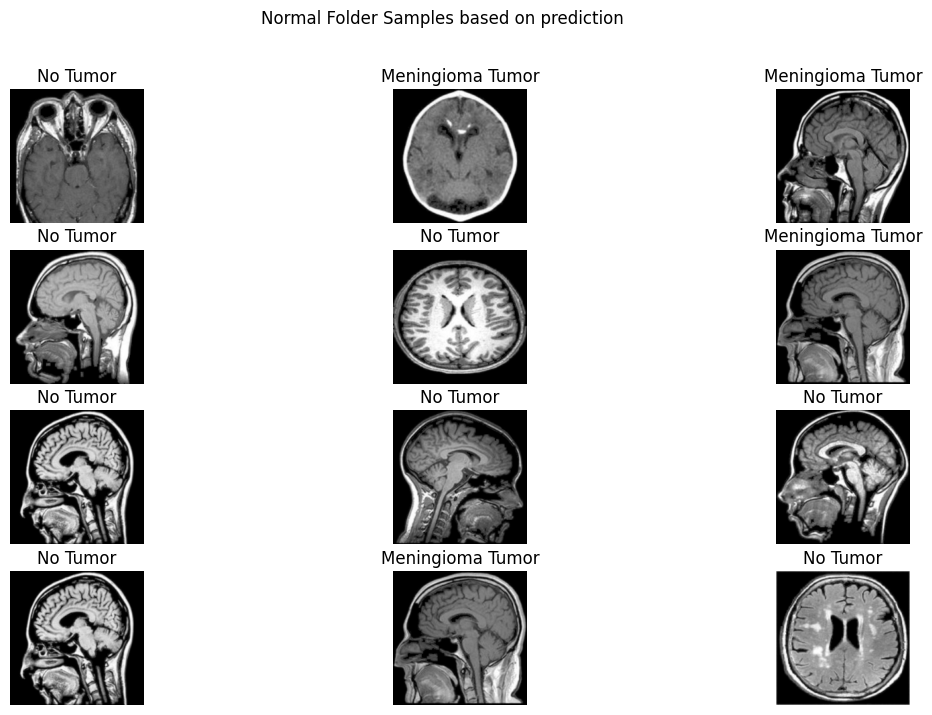

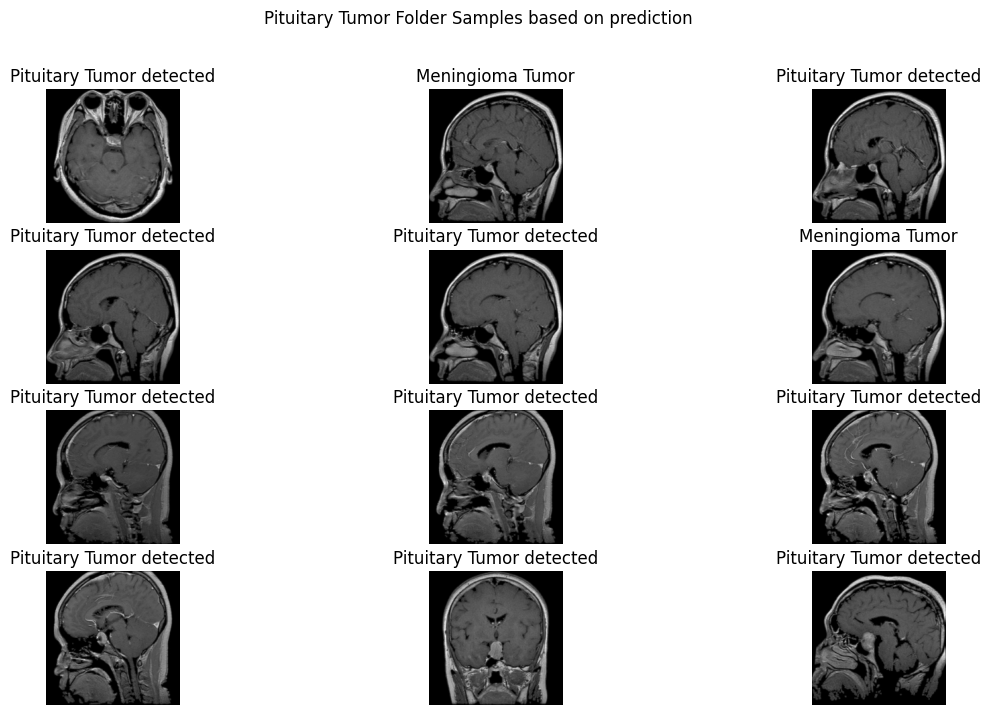

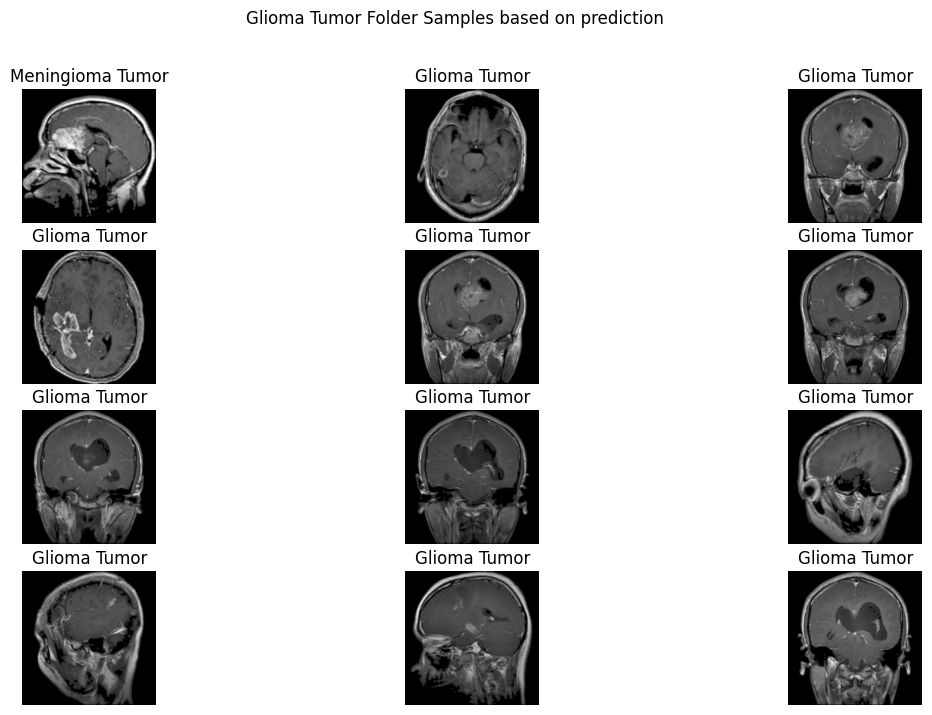

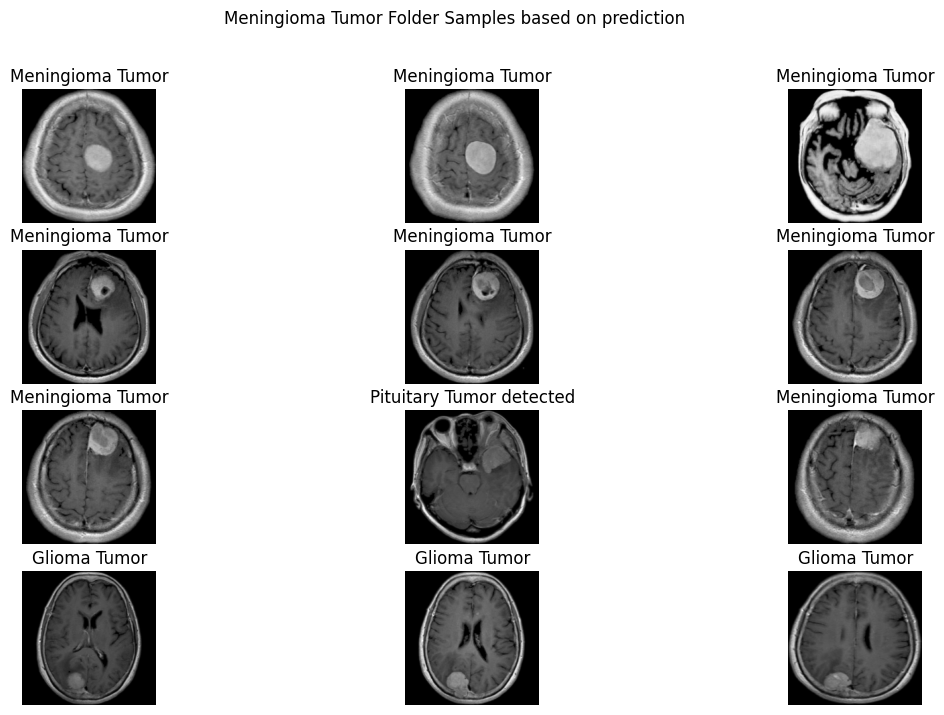

In [47]:
dec = {0: 'No Tumor', 1: 'Pituitary Tumor detected', 2: 'Glioma Tumor', 3: 'Meningioma Tumor'}
# Display sample images and predictions for each tumor type
tumor_folders = ['normal', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
for tumor_folder in tumor_folders:
    folder_path = f"C:\\Users\\dell\\OneDrive\\Desktop\\Data\\Test_Data\\{tumor_folder}"
    title = f'{tumor_folder.replace("_", " ").title()} Folder Samples based on prediction'
    display_samples(folder_path, title)

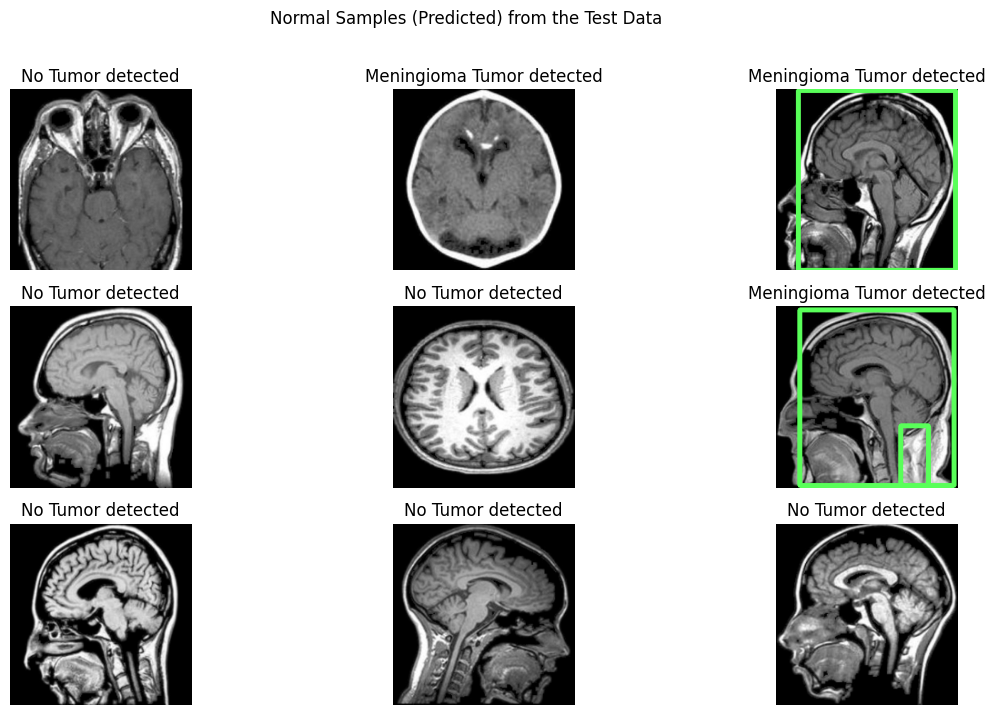

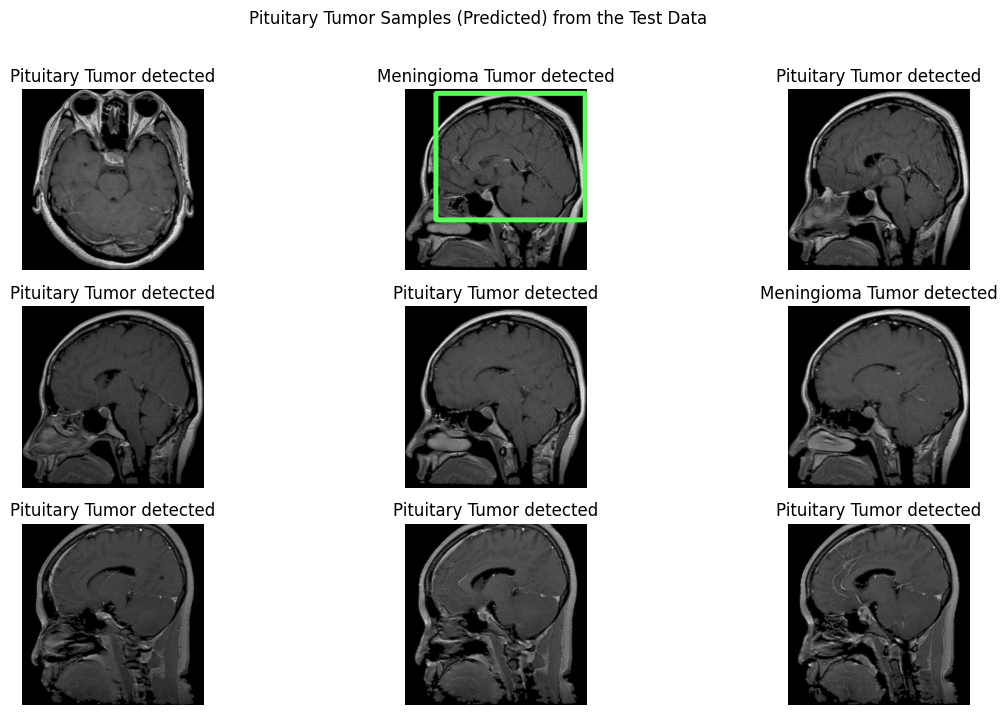

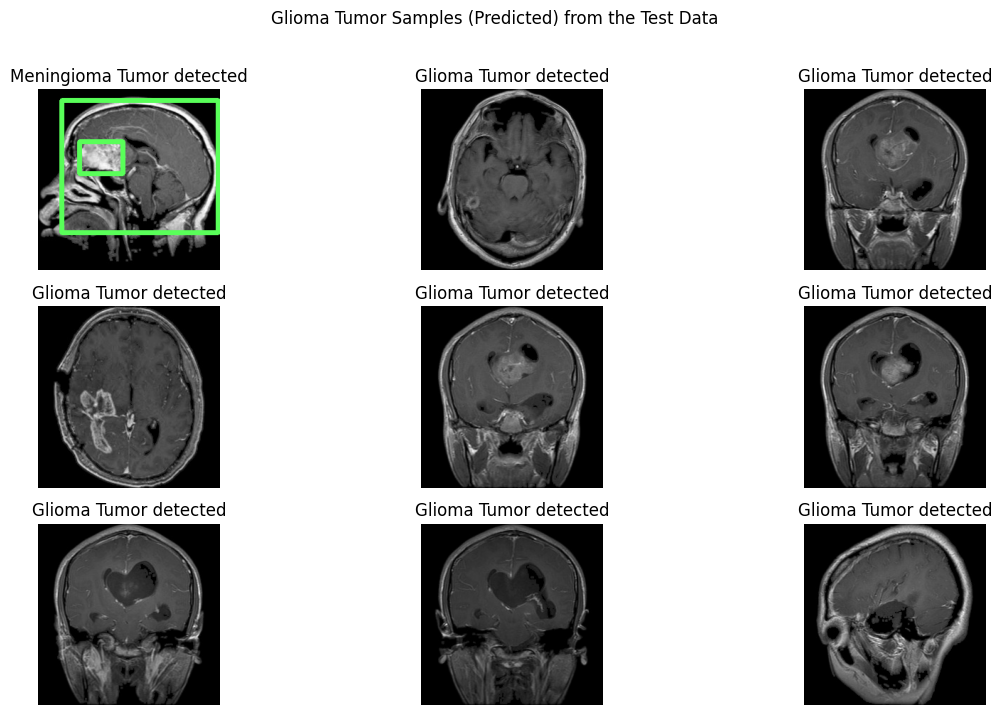

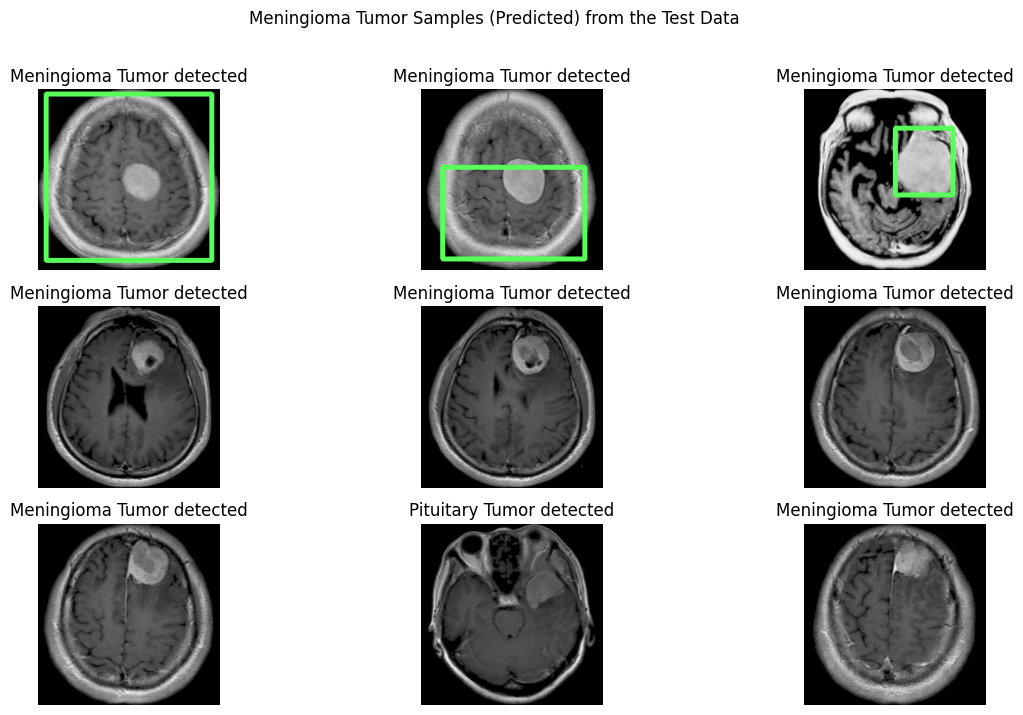

In [48]:
def display_samples(folder, title, num_samples=9):
    plt.figure(figsize=(14, 8))
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img_processed = cv2.resize(img, (200, 200)).flatten() / 255.0  # Preprocess the test image
        
        prediction = sv.predict(pca.transform([img_processed]))
        # prediction = lr.predict(pca.transform([img_processed]))

        
        plt.subplot(3, 3, c)
        plt.title(dec[prediction[0]])  
        plt.imshow(img_processed.reshape(200, 200), cmap='gray')
        plt.axis('off')
        c += 1
        
        if prediction[0] in [1, 2, 3]:  
            img_color = cv2.imread(os.path.join(folder, filename))  
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(img_gray, 175, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV)
            
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
            # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            for cnt in contours:
                area = cv2.contourArea(cnt)
                if area < 18000 and area > 1000:
                # if area < 1000 and area > 600:
                    x, y, w, h = cv2.boundingRect(cnt)
                    cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
                # epsilon = 0.1 * cv2.arcLength(cnt, True)
                # approx = cv2.approxPolyDP(cnt, epsilon, True)
                
                # if 10000 < area < 35000 and len(approx) >= 0:  # Adjust area and vertex count threshold
                #     x, y, w, h = cv2.boundingRect(approx)
                #     cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
            
            # Display the processed image with bounding box
            plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    
    plt.suptitle(title)
    plt.show()

# Define the label mapping
dec = {0: 'No Tumor detected', 1: 'Pituitary Tumor detected', 2: 'Glioma Tumor detected', 3: 'Meningioma Tumor detected'}
# dec = {0: 'No Tumor', 1: 'Glioma Tumor', 2: 'Meningioma Tumor'}

# Display sample images and predictions for each tumor type
tumor_folders = ['normal', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
for tumor_folder in tumor_folders:
    folder_path = f"C:\\Users\\dell\\OneDrive\\Desktop\\Data\\Test_Data\\{tumor_folder}"
    title = f'{tumor_folder.replace("_", " ").title()} Samples (Predicted) from the Test Data'
    display_samples(folder_path, title)


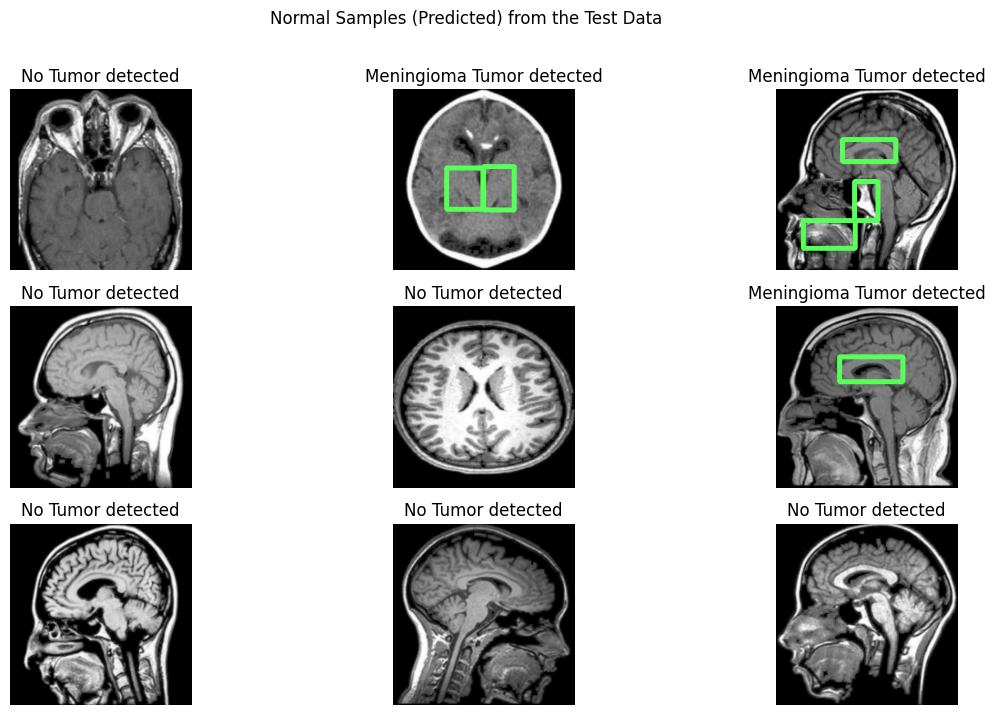

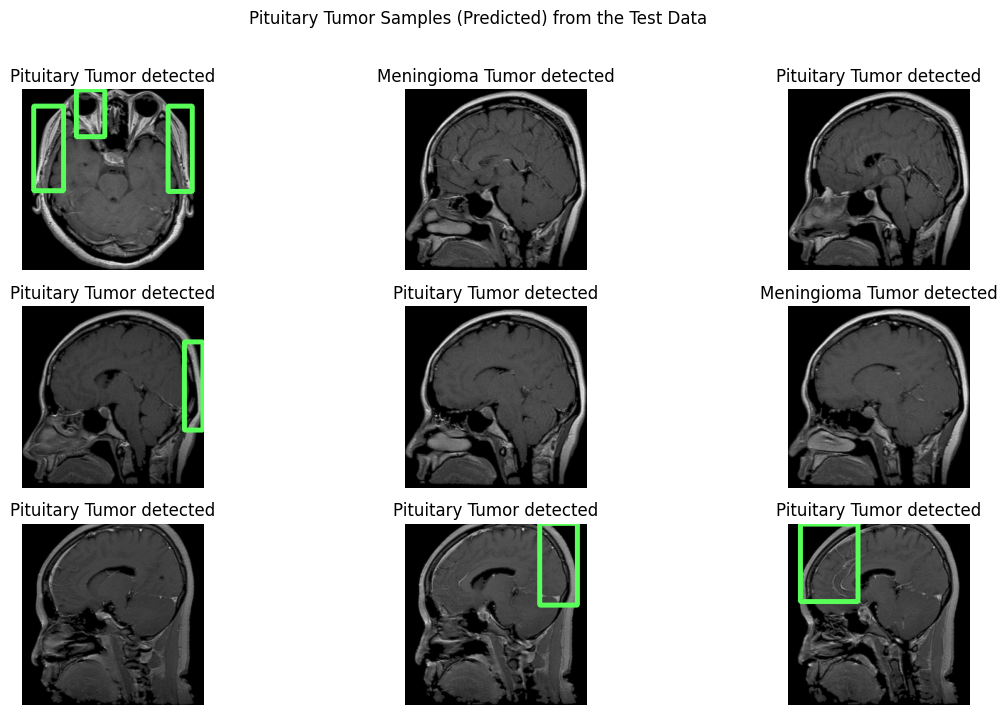

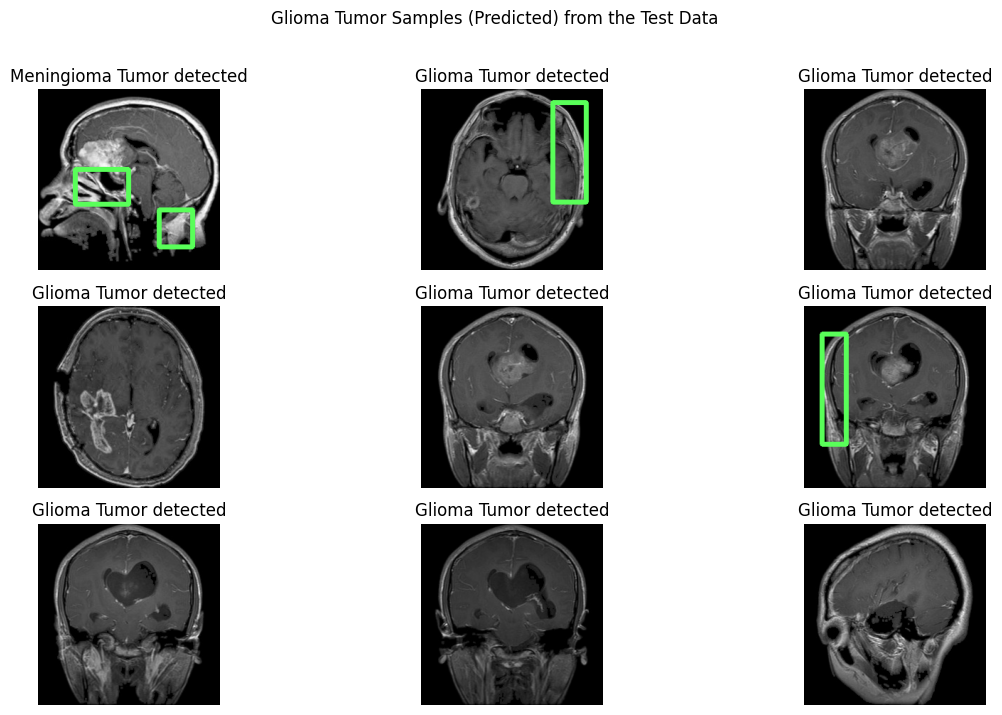

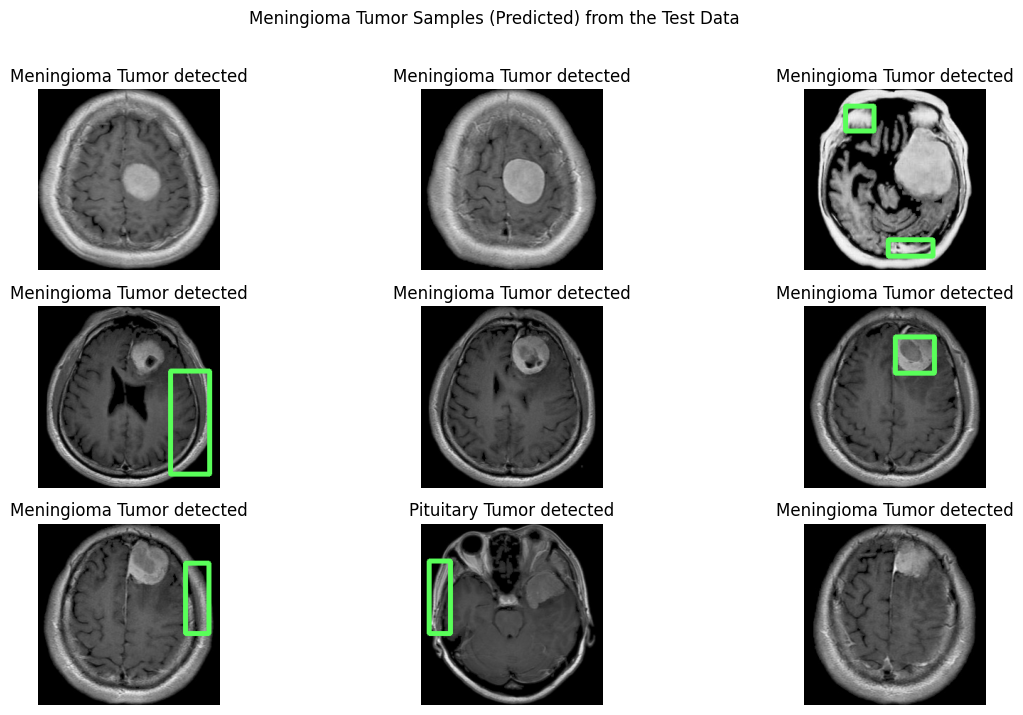

In [49]:
def display_samples(folder, title, num_samples=9):
    plt.figure(figsize=(14, 8))
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img_processed = cv2.resize(img, (200, 200)).flatten() / 255.0  # Preprocess the test image
        

        prediction = sv.predict(pca.transform([img_processed]))
        # prediction = lr.predict(pca.transform([img_processed]))

        
        plt.subplot(3, 3, c)
        plt.title(dec[prediction[0]])  
        plt.imshow(img_processed.reshape(200, 200), cmap='gray')  
        plt.axis('off')
        c += 1

        if prediction[0] in [1, 2, 3]:  
            img_color = cv2.imread(os.path.join(folder, filename))  # Read color image
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY)
            
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
            # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            for cnt in contours:
                area = cv2.contourArea(cnt)
                # if area < 18000 and area > 3000:
                if area < 1100 and area > 600:
                    x, y, w, h = cv2.boundingRect(cnt)
                    cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
                # epsilon = 0.1 * cv2.arcLength(cnt, True)
                # approx = cv2.approxPolyDP(cnt, epsilon, True)
                
                # if 10000 < area < 35000 and len(approx) >= 0:  # Adjust area and vertex count threshold
                #     x, y, w, h = cv2.boundingRect(approx)
                #     cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
            
            # Display the processed image with bounding box
            plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    
    plt.suptitle(title)
    plt.show()

# Define the label mapping
dec = {0: 'No Tumor detected', 1: 'Pituitary Tumor detected', 2: 'Glioma Tumor detected', 3: 'Meningioma Tumor detected'}
# dec = {0: 'No Tumor', 1: 'Glioma Tumor', 2: 'Meningioma Tumor'}

# Display sample images and predictions for each tumor type
tumor_folders = ['normal', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']
for tumor_folder in tumor_folders:
    folder_path = f"C:\\Users\\dell\\OneDrive\\Desktop\\Data\\Test_Data\\{tumor_folder}"
    title = f'{tumor_folder.replace("_", " ").title()} Samples (Predicted) from the Test Data'
    display_samples(folder_path, title)


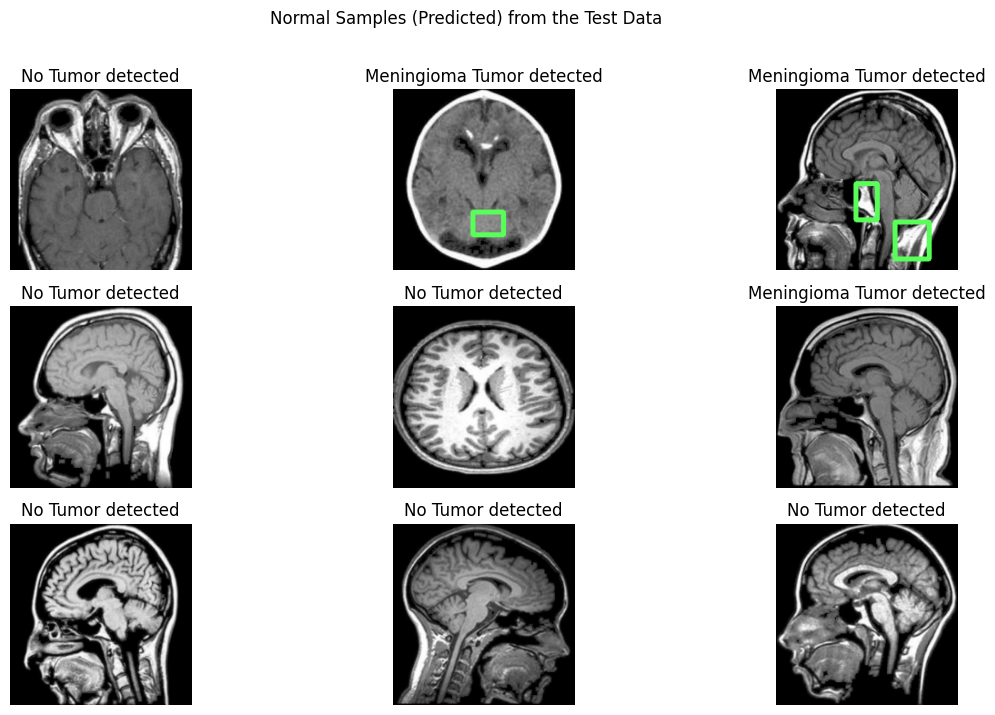

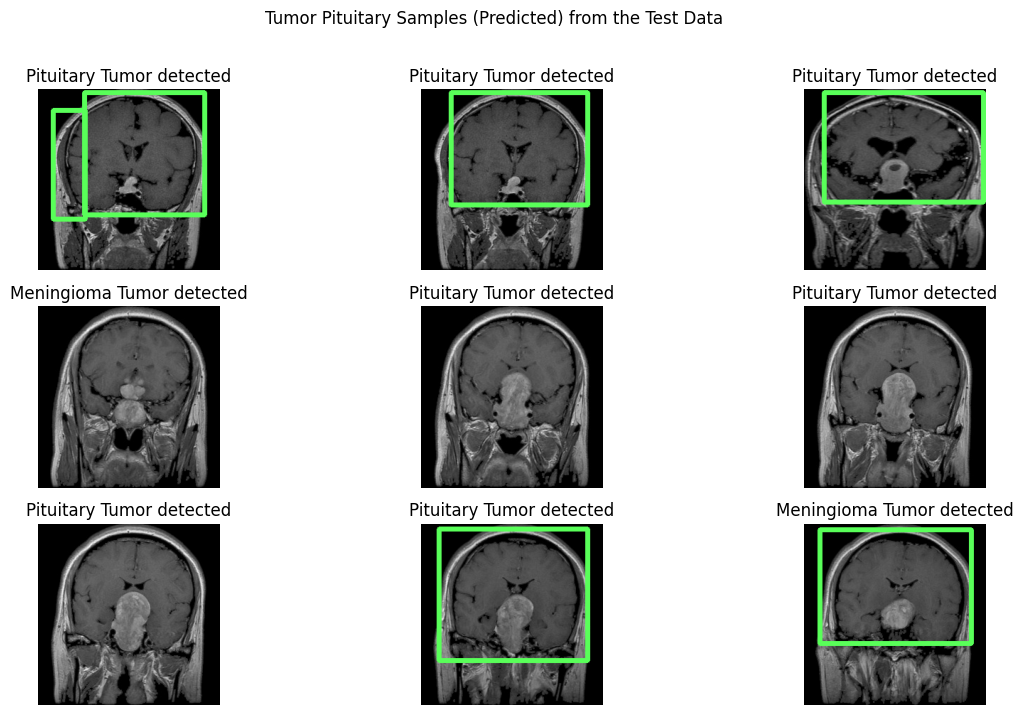

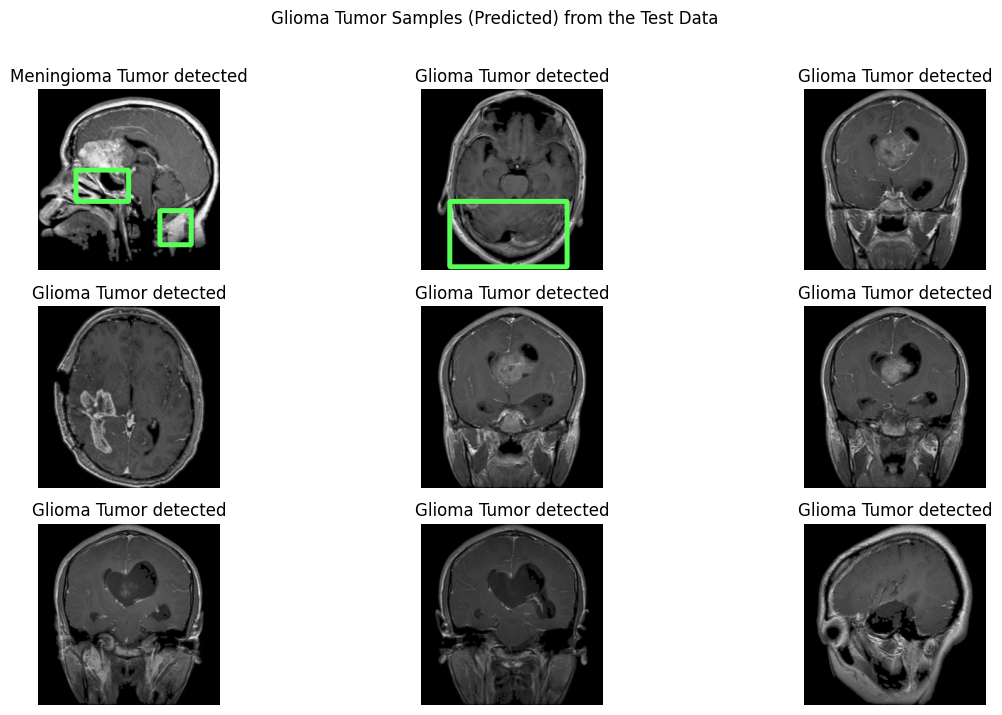

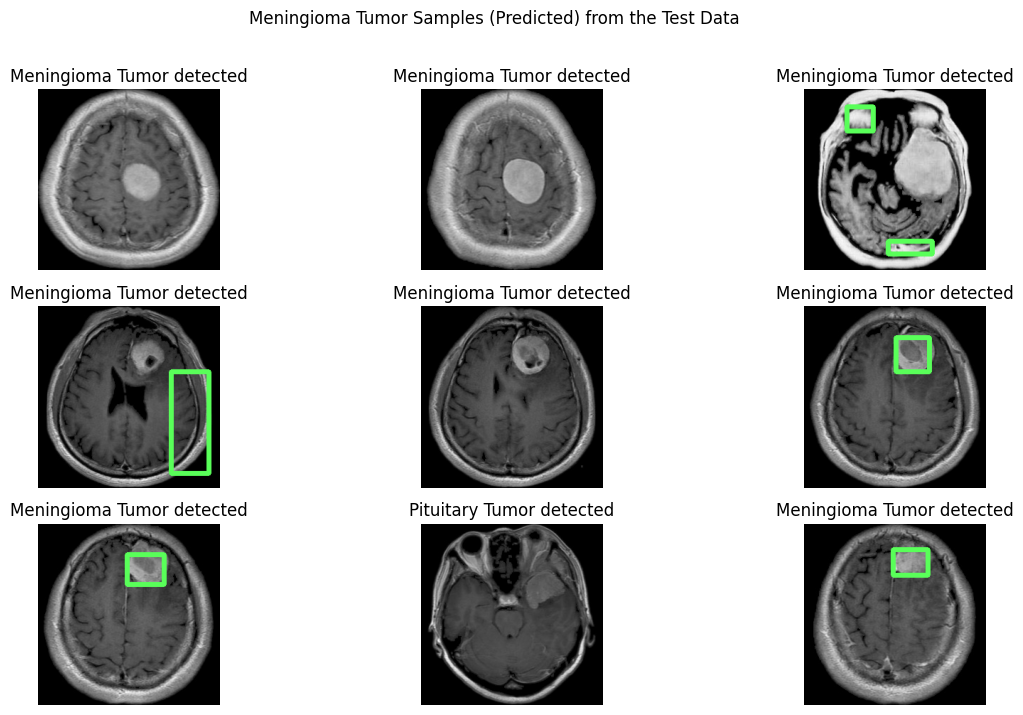

In [50]:
def display_samples(folder, title, num_samples=9):
    plt.figure(figsize=(14, 8))
    c = 1
    for i, filename in enumerate(os.listdir(folder)[:num_samples]):
        img = cv2.imread(os.path.join(folder, filename), 0)
        img_processed = cv2.resize(img, (200, 200)).flatten() / 255.0  # Preprocess the test image
        
        # Predict using the trained SVM
        # prediction = sv.predict(pca.transform([img_processed]))
        prediction = sv.predict(pca.transform([img_processed]))

        
        plt.subplot(3, 3, c)
        plt.title(dec[prediction[0]])  # Map prediction to human-readable label
        plt.imshow(img_processed.reshape(200, 200), cmap='gray')  # Display the image
        plt.axis('off')
        c += 1
        
        # If the predicted class indicates a tumor (1, 2, or 3), apply contour detection and bounding box
        if prediction[0] in [1, 2, 3]:  # Assuming classes 1, 2, 3 correspond to tumor types
            img_color = cv2.imread(os.path.join(folder, filename))  # Read color image
            img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(img_gray, 137, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY)
            
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
            # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            for cnt in contours:
                area = cv2.contourArea(cnt)
                # if area < 18000 and area > 3000:
                if area < 1000 and area > 490:
                    x, y, w, h = cv2.boundingRect(cnt)
                    cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
                # epsilon = 0.1 * cv2.arcLength(cnt, True)
                # approx = cv2.approxPolyDP(cnt, epsilon, True)
                
                # if 10000 < area < 35000 and len(approx) >= 0:  # Adjust area and vertex count threshold
                #     x, y, w, h = cv2.boundingRect(approx)
                #     cv2.rectangle(img_color, (x, y), (x + w, y + h), (89, 255, 89), 5)
            
            # Display the processed image with bounding box
            plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    
    plt.suptitle(title)
    plt.show()

# Define the label mapping
dec = {0: 'No Tumor detected', 1: 'Pituitary Tumor detected', 2: 'Glioma Tumor detected', 3: 'Meningioma Tumor detected'}
# dec = {0: 'No Tumor', 1: 'Glioma Tumor', 2: 'Meningioma Tumor'}

# Display sample images and predictions for each tumor type
tumor_folders = ['normal', 'tumor_pituitary', 'glioma_tumor', 'meningioma_tumor']
for tumor_folder in tumor_folders:
    folder_path = f"C:\\Users\\dell\\OneDrive\\Desktop\\Data\\Test_Data\\{tumor_folder}"
    title = f'{tumor_folder.replace("_", " ").title()} Samples (Predicted) from the Test Data'
    display_samples(folder_path, title)


In [51]:
pred_svm=sv.predict(pca_test)
print(accuracy_score(pred_svm,val_test))

0.8631578947368421


In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

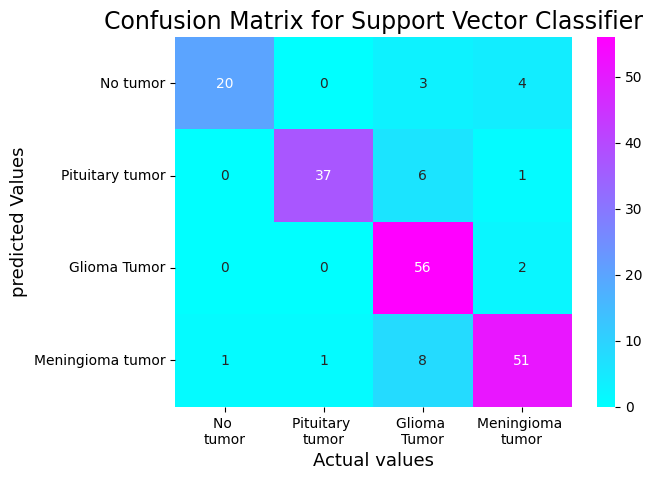

In [53]:
cm = confusion_matrix(val_test,pred_svm)
sns.heatmap(cm, 
            annot=True,
            xticklabels=['No \ntumor','Pituitary \ntumor','Glioma \nTumor','Meningioma \ntumor'],
            yticklabels=['No tumor','Pituitary tumor','Glioma Tumor','Meningioma tumor'],
            fmt='g',cmap='cool'
            )
plt.ylabel('predicted Values',fontsize=13)
plt.xlabel('Actual values',fontsize=13)
plt.title('Confusion Matrix for Support Vector Classifier',fontsize=17)
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(val_test,pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.97      0.84      0.90        44
           2       0.77      0.97      0.85        58
           3       0.88      0.84      0.86        61

    accuracy                           0.86       190
   macro avg       0.89      0.85      0.86       190
weighted avg       0.88      0.86      0.86       190

